# Data Pre-Prossesing  
*train dataset (dfts)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfts=pd.read_csv(r"C:\Users\irsha\Kaggle\House Prices - Advanced Regression Techniques\dataset\train.csv")
dfts.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_rows




999

In [4]:
dfts.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
dfts.shape



(1460, 81)

# Identify ineffective features

<AxesSubplot:>

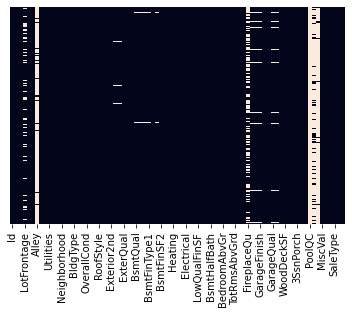

In [6]:
sns.heatmap(dfts.isnull(),cbar=False,yticklabels=False)



# Feature Engineering

Fill missing values with mean

* numerical null column replaced by mean,object null values replaced by mode
* column that has >1400 null values will be droped

In [7]:
dfts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
dfts['LotFrontage'].fillna(dfts['LotFrontage'].mean(), inplace=True)

In [9]:
dfts.drop(['Alley'],axis=1,inplace=True)

In [10]:
dfts.shape

(1460, 80)

In [11]:
dfts['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
dfts['BsmtQual'].fillna(dfts['BsmtQual'].mode()[0],inplace=True)


In [13]:
dfts['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [14]:
dfts['BsmtCond'].fillna(dfts['BsmtCond'].mode()[0],inplace=True)

In [15]:
dfts['BsmtExposure'].fillna(dfts['BsmtExposure'].mode()[0],inplace=True)


In [16]:
dfts['BsmtFinType1'].fillna(dfts['BsmtFinType1'].mode()[0],inplace=True)
dfts['BsmtFinType2'].fillna(dfts['BsmtFinType2'].mode()[0],inplace=True)

In [17]:
dfts['Electrical'].fillna(dfts['Electrical'].mode()[0],inplace=True)
dfts['FireplaceQu'].fillna(dfts['FireplaceQu'].mode()[0],inplace=True)
dfts['GarageType'].fillna(dfts['GarageType'].mode()[0],inplace=True)
dfts['GarageFinish'].fillna(dfts['GarageFinish'].mode()[0],inplace=True)
dfts['GarageQual'].fillna(dfts['GarageQual'].mode()[0],inplace=True)
dfts['GarageCond'].fillna(dfts['GarageCond'].mode()[0],inplace=True)

In [18]:
dfts['GarageYrBlt'].fillna(dfts['GarageYrBlt'].mean(),inplace=True)
dfts['GarageArea'].fillna(dfts['GarageArea'].mean(),inplace=True)


In [19]:
dfts.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

* id is an unique identifier it doesn't has any dependency so we also can drop it

In [20]:
dfts.drop(['Id'],axis=1,inplace=True)

In [21]:
dfts.shape

(1460, 76)

In [22]:
dfts.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

<AxesSubplot:>

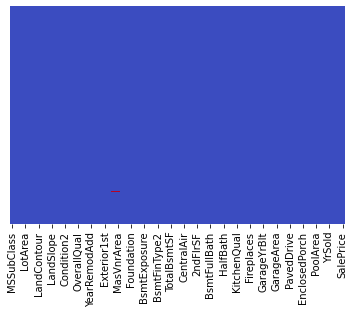

In [23]:
sns.heatmap(dfts.isnull(),cbar=False,yticklabels=False,cmap='coolwarm')

In [24]:
dfts['MasVnrType'].info()
dfts['MasVnrArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
1452 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [25]:
dfts['MasVnrArea'].fillna(dfts['MasVnrArea'].mean(),inplace=True)

In [26]:
dfts['MasVnrType'].fillna(dfts['MasVnrType'].mode()[0],inplace=True)

<AxesSubplot:>

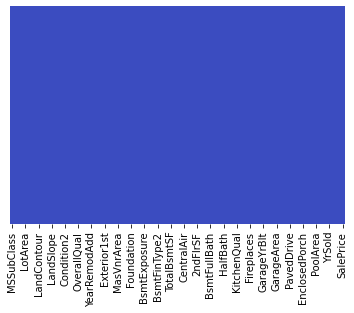

In [27]:
sns.heatmap(dfts.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)

In [28]:
dfts.shape

(1460, 76)

# Test dataset
(dft)

In [29]:
dft=pd.read_csv(r'C:\Users\irsha\Kaggle\House Prices - Advanced Regression Techniques\dataset\test.csv')

In [30]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
dft.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [40]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [33]:
dft['LotFrontage'].fillna(dft['LotFrontage'].mean(), inplace=True)

dft['MasVnrArea'].fillna(dft['MasVnrArea'].mean(), inplace=True)
dft['BsmtFinSF1'].fillna(dft['BsmtFinSF1'].mean(), inplace=True)
dft['BsmtFinSF2'].fillna(dft['BsmtFinSF2'].mean(), inplace=True)
dft['TotalBsmtSF'].fillna(dft['TotalBsmtSF'].mean(), inplace=True)
dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mean(), inplace=True)



In [34]:
dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0], inplace=True)
dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0], inplace=True)
dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0], inplace=True)
dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0], inplace=True)
dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0], inplace=True)
dft['FireplaceQu'].fillna(dft['FireplaceQu'].mode()[0], inplace=True)
dft['GarageType'].fillna(dft['GarageType'].mode()[0], inplace=True)
dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0], inplace=True)
dft['GarageQual'].fillna(dft['GarageQual'].mode()[0], inplace=True)
dft['GarageCond'].fillna(dft['GarageCond'].mode()[0], inplace=True)

In [ ]:
dft.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [50]:
dft.drop(['Id'],axis=1,inplace=True)

In [51]:
dft.shape


(1447, 75)

<AxesSubplot:>

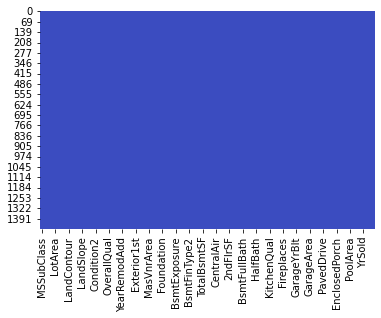

In [53]:
sns.heatmap(dft.isnull(),cbar=False,cmap='coolwarm')

In [38]:
dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0], inplace=True)

In [52]:
dft.dropna(inplace=True)

# export selected data

In [55]:
dft.to_csv('Selected_test.csv',index=False)
dfts.to_csv('Selected_train.csv',index=False)

# Dummy Trapping

In [75]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [76]:
len(columns)

39

In [69]:
#spot dummy veriable for categorical data
def dummy_trapping(multicolumns):
    df_final=final_df
    i=0
    for fields in multicolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [59]:
main_df=dfts.copy()

In [60]:

dfts.shape

(1460, 76)

In [61]:
dft.shape

(1447, 75)

In [77]:
#row wise concatenation
final_df=pd.concat([dfts,dft],axis=0)

In [78]:
final_df.shape

(2907, 76)

In [79]:
final_df['SalePrice'].isnull().sum()

1447

In [80]:
final_df=dummy_trapping(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [82]:
final_df.shape

(2907, 237)

In [83]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [84]:
final_df.shape

(2907, 177)

In [95]:
df_Trainset=final_df.iloc[:1460,:]
df_Testset=final_df.iloc[1447:,:]

In [97]:
df_Trainset['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

<AxesSubplot:>

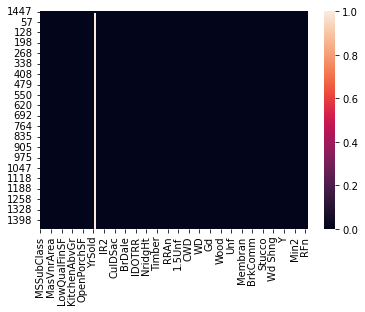

In [99]:
sns.heatmap(df_Testset.isnull())

In [ ]:
df_Testset.drop(['SalePrice'],axis=1,inplace=True)

In [103]:
df_Testset.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
FV               0
RH               0
RL               0
RM               0
Pave             0
IR2              0
IR3              0
Reg              0
HLS              0
Low              0
Lvl              0
NoSeWa           0
CulDSac          0
FR2              0
FR3              0
Inside           0
Mod         

In [104]:
df_Testset.to_csv('finalTestdata.csv',index=False)
df_Trainset.to_csv('finalTraindata.csv',index=False)